## Assignment on Dimensionality Reduction - 4 (PCA)

### Assignment: PCA Implementation

Objective:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

Instructions:
Download the wine dataset from the UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/Wine)
Load the dataset into a Pandas dataframe.
Split the dataset into features and target variables.
Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
Implement PCA on the preprocessed dataset using the scikit-learn library.
Determine the optimal number of principal components to retain based on the explained variance ratio.
Visualise the results of PCA using a scatter plot.
Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
Interpret the results of PCA and clustering analysis.

Deliverables:
Jupyter notebook containing the code for the PCA implementation.
A report summarising the results of PCA and clustering analysis.
Scatter plot showing the results of PCA.
A table showing the performance metrics for the clustering algorithm.

Additional Information:
You can use the python programming language.
You can use any other machine learning libraries or tools as necessary.
You can use any visualisation libraries or tools as necessary.

In [28]:
import pandas as pd
import numpy as np

data_url = "wine.csv"
df = pd.read_csv(data_url)

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
X=df.iloc[:,:-1]
y=df['quality']

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [25]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [26]:
X_pca=pca.fit_transform(X_scaled)

In [29]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [30]:
explained_variance

array([0.28173931, 0.1750827 ])

In [31]:
cumulative_variance

array([0.28173931, 0.45682201])

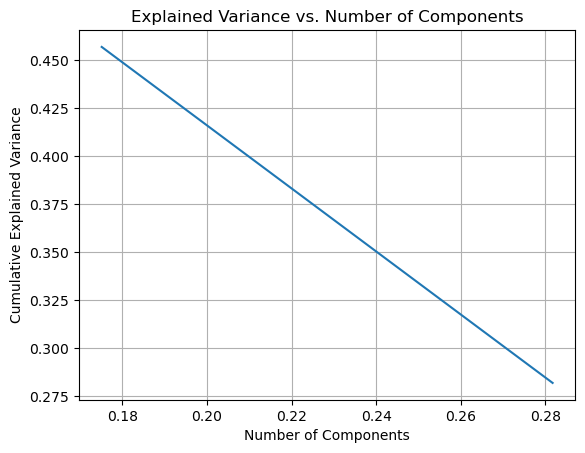

In [41]:
# Plot the cumulative explained variance ratio to visualize the optimal number of components
import matplotlib.pyplot as plt

plt.plot(explained_variance ,cumulative_variance)

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

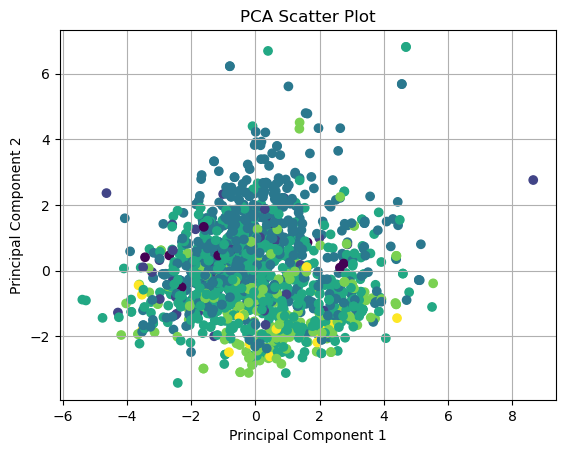

In [45]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.grid()
plt.show()

In [46]:
from sklearn.cluster import KMeans

# Assuming you want to cluster into k clusters (you can choose based on your analysis)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_pca)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
from sklearn.metrics import silhouette_score

silhouette_score_pca = silhouette_score(X_pca, y_pred)
inertia = kmeans.inertia_
# Add more metrics as needed


In [48]:
inertia

3300.64396921036